In [71]:
from maap.maap import MAAP
maap = MAAP()

import ipycmc
w = ipycmc.MapCMC()

In [72]:
#load some other functions from maap.maap import MAAP
import ipycmc
import sys
import maap
import json
import sys
import shutil
import requests
import os
from os import system
maap = MAAP()

In [73]:
#Step 2 - pull some data over area of interest
#First, run function to return a list of granules toward batch processing
def get_granules_list(granules):
    url_list = []
    output_list = []
    for res in granules:
        url_list.append(res.getDownloadUrl())

    for url in url_list:
        if url[0:5] == 's3://':
            url = url[5:].split('/')
            url[0] += '.s3.amazonaws.com'
            url = 'https://' + '/'.join(url)
        print(url)
        output_list.append(url)
    return output_list

In [74]:
#Step 2 cont.
#function to download a list of granules locally
def download_granules(granules, output_dir):
    url_list = []
    for res in granules:
        url_list.append(res.getDownloadUrl())

    for url in url_list:
        if url[0:5] == 's3://':
            url = url[5:].split('/')
            url[0] += '.s3.amazonaws.com'
            url = 'https://' + '/'.join(url)
        print(url)
        name = output_dir + url.split('/')[-1]
        print(name)
        r = requests.get(url, allow_redirects=True)
        open(name, 'wb').write(r.content)

In [165]:
# Step 2 cont.
#download the files of interest to local workspace

#atl03_granules=maap.searchGranule(collection_concept_id="C1200166513-NASA_MAAP", bounding_box="-180.0,50.0,180.0,90.0", limit=10)
#atl08_granules=maap.searchGranule(collection_concept_id="C1200235747-NASA_MAAP", bounding_box="-180.0,50.0,180.0,90.0", limit=10)

atl03_granules=maap.searchGranule(collection_concept_id="C1200166513-NASA_MAAP", bounding_box="-102.7684,43.17366,-97.32037,47.48166")
atl08_granules=maap.searchGranule(collection_concept_id="C1200235747-NASA_MAAP", bounding_box="-102.7684,43.17366,-97.32037,47.48166")

count=0
for f in range(0,len(atl03_granules)):
    ID = atl03_granules[f]['Granule']['OnlineAccessURLs']['OnlineAccessURL']['URL']
    ID2 = atl08_granules[f]['Granule']['OnlineAccessURLs']['OnlineAccessURL']['URL']
    #print(ID)
    count=count+1
    download_dir = '/projects/above/testing/30m_testing/'
    existingfiles = [file for file in os.listdir(download_dir)]
    if ID in existingfiles or ID2 in existingfiles:
        print('file exists...')
    else:                        
        atl03_granules[f].getLocalPath(download_dir) 
        atl08_granules[f].getLocalPath(download_dir)    
print(count)

20


In [76]:
#figure out how to ensure matched pairs
output_list_03 =  get_granules_list(atl03_granules)
output_list_08 =  get_granules_list(atl08_granules)

https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014001049_02350102_002_01.h5
https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014001920_02350103_002_01.h5
https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014002445_02350104_002_01.h5
https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014002954_02350105_002_01.h5
https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014003519_02350106_002_01.h5
https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014014507_02360102_002_01.h5
https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014015337_02360103_002_01.h5
https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014015902_02360104_002_01.h5
https://cumulus-map-internal.s3.amazonaw

In [142]:
#atl03_granules[0].getDownloadUrl()
print(output_list_03[6])
print(output_list_08[6])
#ATL08_30m_20181014001920_02350103_003_01

https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL03___002/ATL03_20181014015337_02360103_002_01.h5
https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL08___003/ATL08_20181014015337_02360103_003_01.h5


In [11]:
#Test the code on the downloaded data, typically in command line
# conda create 

In [ ]:
# Step 7 - run a DPS job!
#first, pick the files you want to run in DPS
#bounding box North America north of 50 degrees lat
ice2_granules=maap.searchGranule(collection_concept_id="C1200116818-NASA_MAAP", bounding_box="-152.5534776481967,50.0,-50.78405971406124,80.10902122001679", limit=10000)


In [158]:
#Step 7 cont.
#try to submit a MAAP job on a single file
result = maap.submitJob(
    identifier='nothing',
    algo_id='run_rebinning_ubuntu',
    version='master',
    username='r2d2',
    #ice2_granules='https://cumulus-map-internal.s3.amazonaws.com/file-staging/nasa-map/ATL08___002/ATL08_20190612084236_11470302_002_01.h5')
    input_atl03 = output_list_03[6],
    input_atl08 = output_list_08[6],
    output = '/output')
print(result)

{'status': 'success', 'http_status_code': 200, 'job_id': 'b08076db-9845-47b9-a9a4-b1e09e932ba0'}


In [93]:
#Step 8
#submit many jobs in a loop to process many files
#ices_granule_id is the list of all the files, this loops through and submits a job for each
#for g in range(0,len(atl03_granules)):
#    granule = g
#    submit_result = maap.submitJob(identifier='ice2', 
#                                   algo_id='run_rebinning_ubuntu', 
#                                   version='master', 
#                                   username='r2d2', 
#                                   ice2_granules=granule)
#    print(submit_result)
    
    #simplified version
for g in range(0,len(output_list_03)):
    submit_result = maap.submitJob(identifier="nothing",
                                   algo_id="run_rebinning_ubuntu",
                                   version="master",
                                   username="r2d2",
                                   input_atl03=output_list_03[g], 
                                   input_atl08=output_list_08[g],
                                   output = '/')
    print(submit_result)

{'status': 'success', 'http_status_code': 200, 'job_id': 'da714755-0f25-4e76-a824-45406757169a'}
{'status': 'success', 'http_status_code': 200, 'job_id': '1c804afd-89d2-43d9-83bd-2a65bd659aa6'}
{'status': 'success', 'http_status_code': 200, 'job_id': '39fedad4-6ad2-4c99-a344-4badbf847a81'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'bfa83104-4dc7-4652-b487-a7d70cae719c'}
{'status': 'success', 'http_status_code': 200, 'job_id': '1903d9b3-4951-4da5-b4de-1b31dec72133'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'add2a941-438e-46ca-ad4d-317bfc745089'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'a0006dcb-ab68-45ad-9538-b5148c4b81e2'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'df09879a-7c45-4edc-adeb-f7eba65356e9'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'b77e3b59-ed5a-457e-b37e-366e4f4074b6'}
{'status': 'success', 'http_status_code': 200, 'job_id': 'fc24fee3-a15b-46ca-a0ff-403da11ba1ea'}


In [ ]:
#Step 9: analyze results
#move all output csv files from super nested dps_output folder to a folder of interest
import os, glob
import shutil
output_dir = "/projects/r2d2/icesat2_batch_demo/csv_out"
base_dir = "/projects/r2d2/dps_output/run_icesat2_gabon_ubuntu"
for file in glob.glob("/projects/r2d2/dps_output/run_icesat2_gabon_ubuntu/master/2020/05/12/**/*.csv", recursive=True):
    print(file)
    shutil.copyfile(file, os.path.join(output_dir, os.path.basename(file)))

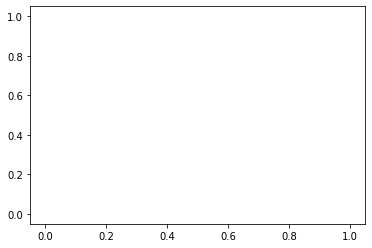

In [1]:
import h5py
import numpy as np
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/02/25/19/30/30/580717/ATL08_30m_20181014001049_02350102_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/02/25/20/04/36/755529/ATL08_30m_20181014001049_02350102_003_01.h5'
#atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/02/25/20/04/33/115612/ATL08_30m_20181014001920_02350103_003_01.h5'
#atl08 = '/projects/above/testing/30m_testing/outputs/ATL08_30m_20181014001049_02350102_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/02/25/20/02/14/904879/ATL08_30m_20181014002445_02350104_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/02/25/20/02/18/011001/ATL08_30m_20181014003519_02350106_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/02/25/20/04/33/115612/ATL08_30m_20181014001920_02350103_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/02/26/00/11/27/770529/ATL08_30m_20181014015337_02360103_003_01.h5'
atl08 = '/projects/above/testing/30m_testing/outputs/ATL08_30m_20181014015337_02360103_003_01.h5'
atl08 = '/projects/r2d2/dps_output/run_rebinning_ubuntu/master/2021/02/26/01/42/50/043564/ATL08_30m_20181014015337_02360103_003_01.h5'
f = h5py.File(atl08,'r')
#x = np.asarray(f['gt1l/land_segments/30m_segment/msw_flag'])
#x = np.asarray(f['gt1l/land_segments/30m_segment/latitude'])
#x = np.asarray(f['gt1l/land_segments/30m_segment/gedi_rh_100'])
x = np.asarray(f['gt1l/land_segments/30m_segment/atl03_ground_median'])
#x = np.asarray(f['gt1l/land_segments/30m_segment/bin_id'])
#x = np.asarray(f['gt1l/land_segments/30m_segment/atl03_n_ground'])
#x = np.asarray(f['gt1l/land_segments/canopy/h_canopy'])
import matplotlib.pyplot as plt
plt.plot(x,'.')

